Computed Otsu Threshold: 118


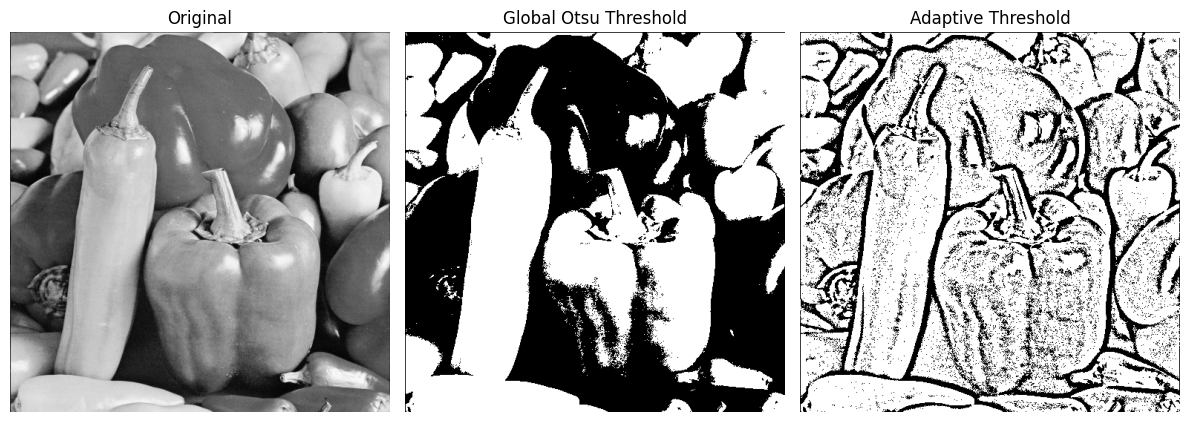

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import uniform_filter


def load_grayscale(image_path):
    """Load image and convert to grayscale numpy array"""
    return np.array(Image.open(image_path).convert("L"))


def global_otsu_threshold(image):
    """Compute global Otsu threshold and apply it"""
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))
    total = image.size
    current_max, threshold = 0, 0
    sumT = np.dot(np.arange(256), hist)
    sumF, wB = 0.0, 0.0

    for t in range(256):
        wF = total - wB
        if wB == 0 or wF == 0:
            wB += hist[t]
            continue
        sumF += t * hist[t]
        mB = sumF / wB
        mF = (sumT - sumF) / wF
        between = wB * wF * (mB - mF) ** 2
        if between > current_max:
            current_max = between
            threshold = t
        wB += hist[t]

    print(f"Computed Otsu Threshold: {threshold}")
    return (image > threshold).astype(np.uint8) * 255


def adaptive_threshold(image, window_size=15, C=5):
    """Manual adaptive mean thresholding"""
    mean = uniform_filter(image.astype(np.float32), size=window_size)
    thresholded = (image > (mean - C)).astype(np.uint8) * 255
    return thresholded


def compare_thresholding(image_path):
    img = load_grayscale(image_path)

    otsu = global_otsu_threshold(img)
    adaptive = adaptive_threshold(img)

    # Plot results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Global Otsu Threshold")
    plt.imshow(otsu, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Adaptive Threshold")
    plt.imshow(adaptive, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return img, otsu, adaptive


# Example usage
if __name__ == "__main__":
    image_path = "stdimgs/peppers.png"  # Replace with your image
    compare_thresholding(image_path)